# Linear Regression in Practice

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [2]:
# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [3]:
# print(ds)

print(ds.keys())

description = ds.get("DESCR")
# print(description)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


With the print method, we can see what gets downloaded with fetch_california_housing(), it's all the data and information about the dataset in different parts of the dictionary. I can access any part of the dictionary with a get method to see anything in particular.

Since ds is a dictionary-like object as declared on the repository, we get these as attributes from the ds.keys(), knowing what the different components are I can use them one by one depending what I may need to access.


### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [4]:
# Create a Pandas DataFrame for our dataset and a Pandas Series for the targets.

# Your code to build the DataFrame here

dataVar = ds.get("data")

# for column names I am using the feature_names that can be found in the starting dataset 
dataNames = ds.get("feature_names")
df = pd.DataFrame(data = dataVar,
                 columns = dataNames)

display(df)


# Your code to build the target Series here

targetVar = ds.get("target")
targets = pd.Series(data = targetVar)

# this is the target variable
print(ds.get("target_names"))
display(targets)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


['MedHouseVal']


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [5]:
display(df.describe())

display(targets.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

The dataset consists of 20.640 different houses with 8 characteristics that influence the value of a particular house based on the market in California at the time of the creation of this dataset.

The indipendent variables (=features) are not scaled similarly. For example latitude and longitude have a very low std since all these houses are in the same region, but population has a min of 3.000000 and a max of 35682.000000 with a std that is also quite high.

---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

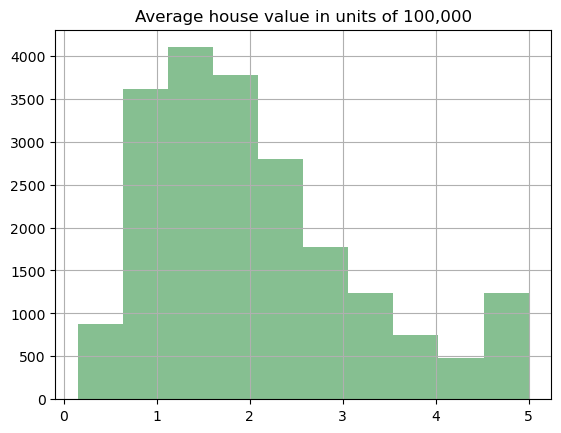

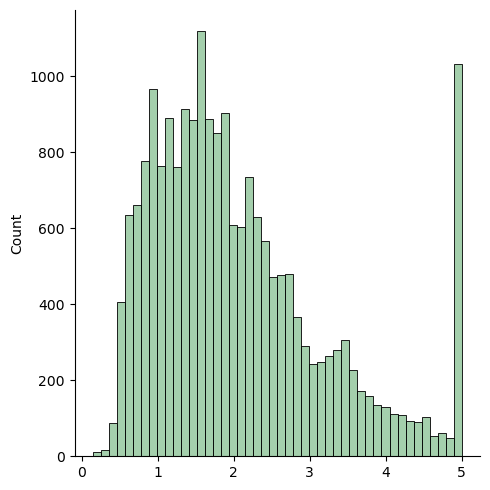

In [6]:
ax = targets.hist(color='#86bf91')
ax.set_title('Average house value in units of 100,000')

import seaborn as sns

sns.displot(data = targets, color='#86bf91')

We can see from these histograms that the majority of houses fall between values 0.4 and 3.0. This means that there are not a lot of houses (at least in this dataset) that are less than 40.000 and more than 300.000 with a spike around 450.000 to 500.000.

On the second graph the spike is much more evident and the distribution is clearer.

### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


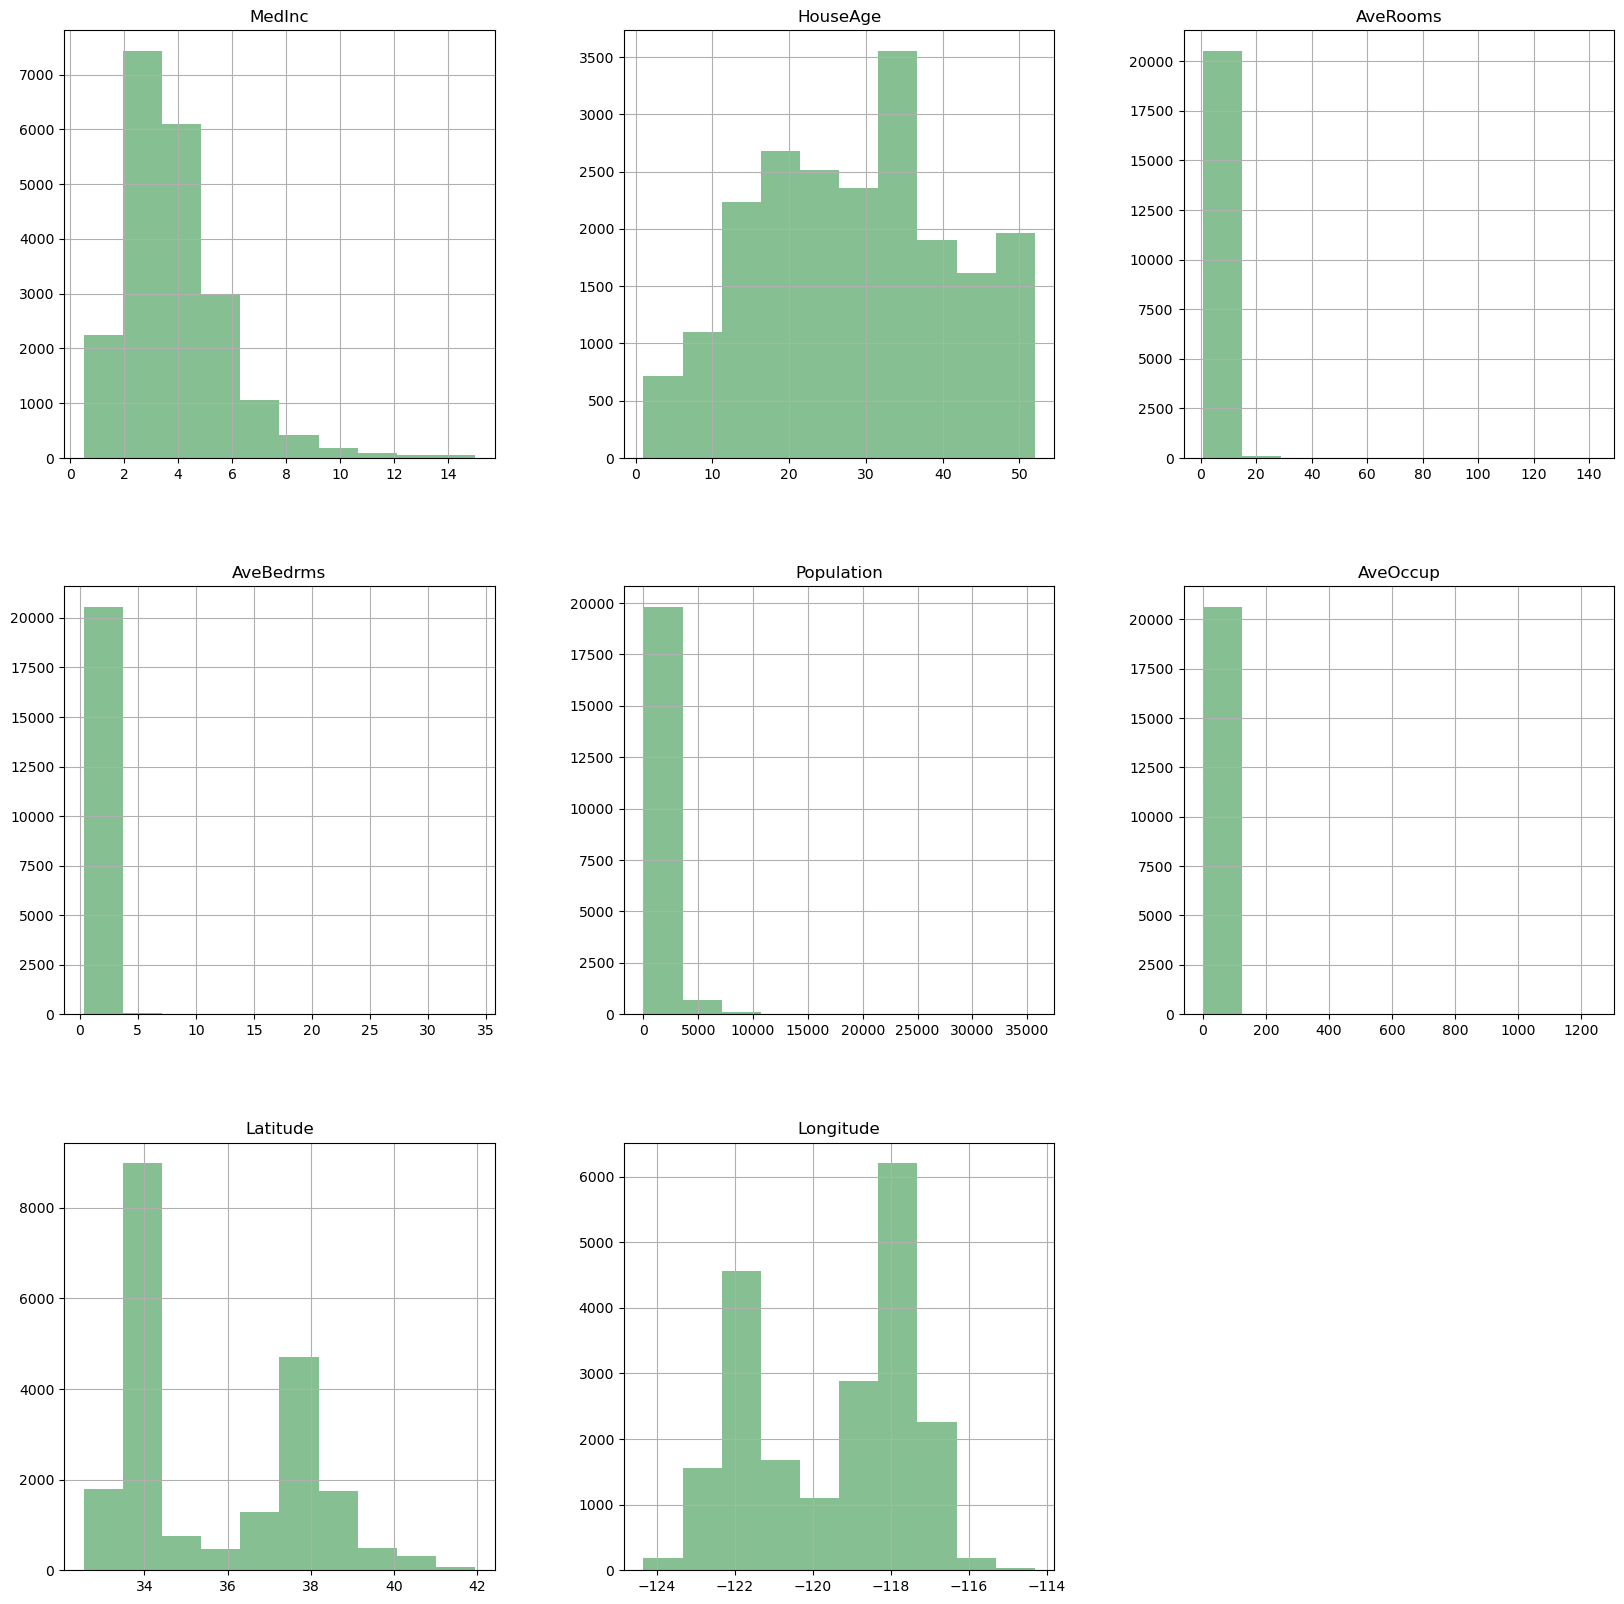

In [7]:
def graphMyDF(dataframe):
    dataframe.hist(figsize=(20, 20), color='#86bf91')
    
graphMyDF(df)

---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.

In [8]:
# Your code here.
from sklearn.model_selection import train_test_split

# Split data into 75-25 train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df, targets, test_size=0.25)

# from here on I will call the independent variables (features) - X, and target variable y

### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

print("The model's score is", model.score(X_train, y_train), ". The best possible score is 1, so not too bad!")

print(model.predict(X_test))

print("The predicted values will be confronted with values from y_test.")

The model's score is 0.6084945705766651 . The best possible score is 1, so not too bad!
[2.69142746 1.69077186 0.6323137  ... 1.44249874 2.74517603 1.23014122]
The predicted values will be confronted with values from y_test.


### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.

In [10]:
import math

def RMSE(y_actual,y_predicted):
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
    RMSE = math.sqrt(MSE)
    return RMSE
    
from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_actual, y_predicted)

def checkSplit(x_ts, y_ts, x_tr, y_tr):
    # we create a model on train set
    modelTrain = LinearRegression().fit(x_tr, y_tr)
    # predict values
    y_pred_ts = modelTrain.predict(x_ts)
    y_pred_tr = modelTrain.predict(x_tr)
    # check results
    RMSE_train = RMSE(y_tr, y_pred_tr)
    RMSE_test = RMSE(y_ts, y_pred_ts)
    MAS_train = mean_absolute_error(y_tr, y_pred_tr)
    MAS_test = mean_absolute_error(y_ts, y_pred_ts)
    print ("RMSE for test split ",RMSE_test)
    print ("MAS for test split ",MAS_test)
    print ("RMSE for train split ",RMSE_train)
    print ("MAS for train split ",MAS_train)    

print("Results for a 25% test size")
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(
    df, targets, test_size=0.25)
checkSplit(X_test_25, y_test_25, X_train_75, y_train_75)

print("Results for a 90% test size")
X_train_10, X_test_90, y_train_10, y_test_90 = train_test_split(
    df, targets, test_size=0.90)
checkSplit(X_test_90, y_test_90, X_train_10, y_train_10)


Results for a 25% test size
RMSE for test split  0.7348616592312781
MAS for test split  0.5287646495149594
RMSE for train split  0.7213866418662882
MAS for train split  0.5309033962510573
Results for a 90% test size
RMSE for test split  0.91740188711283
MAS for test split  0.5289356726783476
RMSE for train split  0.7088987630736013
MAS for train split  0.5167497522758352


Why is the performance on the train set different than that on the test split? 
- Intuitively, the model should perform better on the training set since it was trained on that dataset. On the other hand, we have a much smaller amount of data in the test set, so it has less chances for errors.
    
What if you change the proportion of training to test data in your splits?
- I have made a second split of the dataset with 90% test and only 10% train. That means that the model will be poorly trained. We can see that in the value of RMSE for test split that became very big comparing to that of the RMSE on train split. 

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

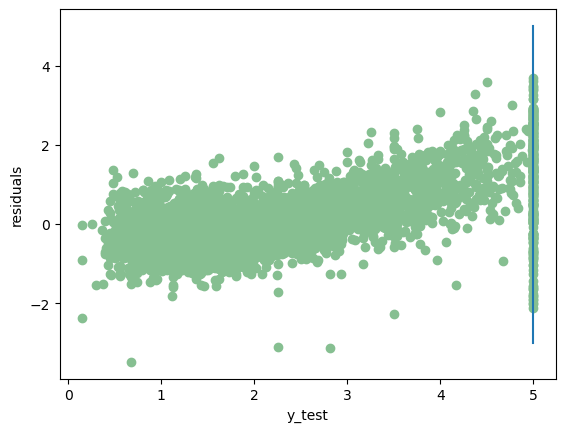

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df, targets, test_size=0.25)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# straight line x = 5
x1, y1 = [5, 5], [-3, 5]
plt.plot(x1, y1)

# residual plot of the data and the predictions
residuals = y_test-y_pred
plt.scatter(y_test,residuals, color='#86bf91')
plt.xlabel("y_test")
plt.ylabel("residuals")
plt.show()

On the graph there is a clear "border" that is the function x = 5. There is also a slight tendency towards positive values with an increasing y_test.
We can say that y_test is in [0, 5] just like we should expect from our dataset, and residuals mostly in (-2, 3) with some outliers.

We can also note that in exercise 2a we determined that the majority of data was between 0.4 and 3.0, just like jere after y_test = 3 we can see that the data becomes a little bit more sparce with a spike around the maximum for target value.

### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

On train 10
RMSE for test split  3.271112295846493
MAS for test split  0.5469464672765729
RMSE for train split  0.6853591062320199
MAS for train split  0.49797590397762126


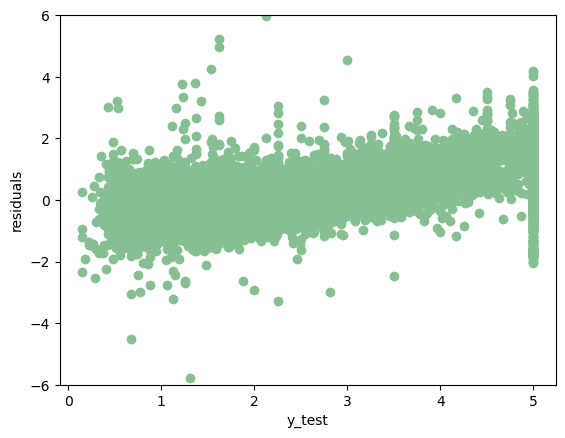

On train 25
RMSE for test split  0.7236790555682538
MAS for test split  0.5326216847312286
RMSE for train split  0.7332995678184661
MAS for train split  0.5356792063804755


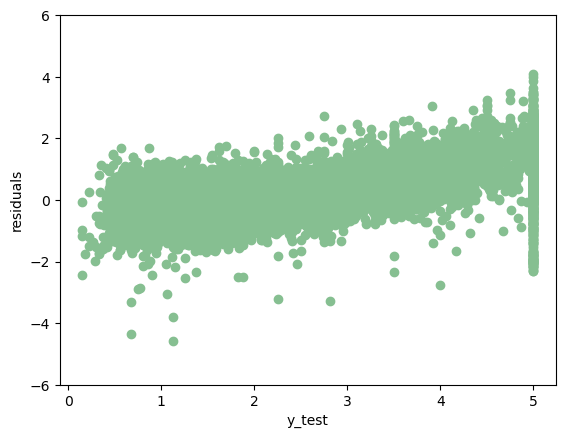

On train 50
RMSE for test split  0.7247602187082235
MAS for test split  0.5283175627967552
RMSE for train split  0.7262359240988945
MAS for train split  0.5362176725668415


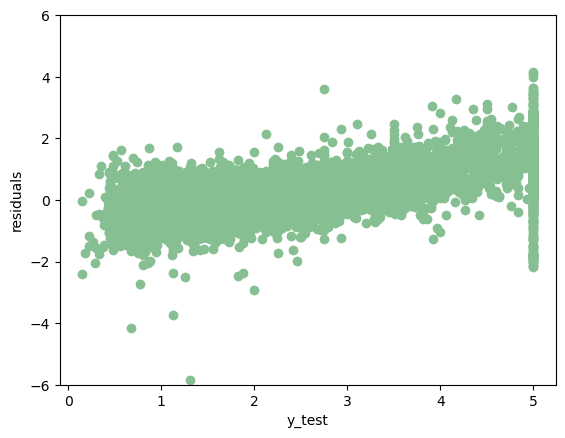

On train 75
RMSE for test split  0.7408286194984823
MAS for test split  0.533369052307693
RMSE for train split  0.7212803606428847
MAS for train split  0.5288002969050418


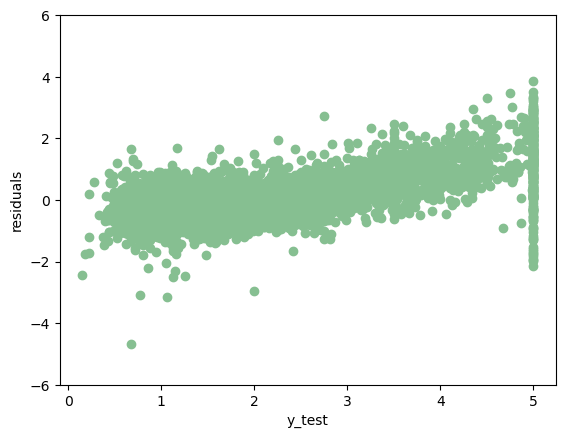

On train 95
RMSE for test split  0.7392307429749485
MAS for test split  0.5464010684292581
RMSE for train split  0.7233342398142937
MAS for train split  0.5302779821554974


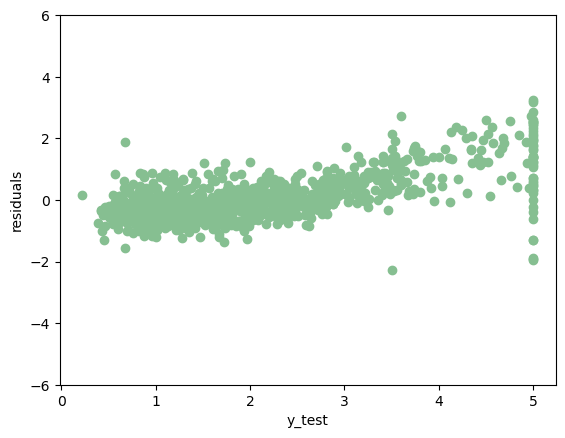

In [12]:
from sklearn.metrics import accuracy_score

def pipeline10(df, targets, train_size = 0.10):
    # first we split the data given a train size
    X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size = 0.10)
    
    # we instantiate the model
    linreg_model = LinearRegression()
    
    # we fit the model
    model = linreg_model.fit(X_train, y_train)
    
    # we evaluate RMSE and MAS 
    y_predict = linreg_model.predict(X_test)
    checkSplit(X_test, y_test, X_train, y_train)
    
    # visualization
    residuals = y_test-y_predict
    plt.scatter(y_test,residuals, color='#86bf91')
    plt.xlabel("y_test")
    plt.ylabel("residuals")
    plt.ylim([-6, 6])
    plt.show()

print("On train 10")
pipeline10(df, targets)

def pipeline25(df, targets, train_size = 0.25):
    # first we split the data given a train size
    X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size = 0.25)
    
    # we instantiate the model
    linreg_model = LinearRegression()
    
    # we fit the model
    model = linreg_model.fit(X_train, y_train)
    
    # we evaluate RMSE and MAS 
    y_predict = linreg_model.predict(X_test)
    checkSplit(X_test, y_test, X_train, y_train)
    
    # visualization
    residuals = y_test-y_predict
    plt.scatter(y_test,residuals, color='#86bf91')
    plt.xlabel("y_test")
    plt.ylabel("residuals")
    plt.ylim([-6, 6])
    plt.show()

print("On train 25")
pipeline25(df, targets)

def pipeline50(df, targets, train_size = 0.50):
    # first we split the data given a train size
    X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size = 0.50)
    
    # we instantiate the model
    linreg_model = LinearRegression()
    
    # we fit the model
    model = linreg_model.fit(X_train, y_train)
    
    # we evaluate RMSE and MAS 
    y_predict = linreg_model.predict(X_test)
    checkSplit(X_test, y_test, X_train, y_train)
    
    # visualization
    residuals = y_test-y_predict
    plt.scatter(y_test,residuals, color='#86bf91')
    plt.xlabel("y_test")
    plt.ylabel("residuals")
    plt.ylim([-6, 6])
    plt.show()

print("On train 50")
pipeline50(df, targets)

def pipeline75(df, targets, train_size = 0.75):
    # first we split the data given a train size
    X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size = 0.75)
    
    # we instantiate the model
    linreg_model = LinearRegression()
    
    # we fit the model
    model = linreg_model.fit(X_train, y_train)
    
    # we evaluate RMSE and MAS 
    y_predict = linreg_model.predict(X_test)
    checkSplit(X_test, y_test, X_train, y_train)
    
    # visualization
    residuals = y_test-y_predict
    plt.scatter(y_test,residuals, color='#86bf91')
    plt.xlabel("y_test")
    plt.ylabel("residuals")
    plt.ylim([-6, 6])
    plt.show()
    return X_train, X_test, y_train, y_test

print("On train 75")
pipeline75(df, targets)

def pipeline95(df, targets, train_size = 0.95):
    # first we split the data given a train size
    X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size = 0.95)
    
    # we instantiate the model
    linreg_model = LinearRegression()
    
    # we fit the model
    model = linreg_model.fit(X_train, y_train)
    
    # we evaluate RMSE and MAS 
    y_predict = linreg_model.predict(X_test)
    checkSplit(X_test, y_test, X_train, y_train)
    
    # visualization
    residuals = y_test-y_predict
    plt.scatter(y_test,residuals, color='#86bf91')
    plt.xlabel("y_test")
    plt.ylabel("residuals")
    plt.ylim([-6, 6])
    plt.show()

print("On train 95")
pipeline95(df, targets)


We can see that the bigger the training split is the less dots we have on the graph since it checks values in the testing split. But the trend of the position of the values on the graph does not change with different size splits.

---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

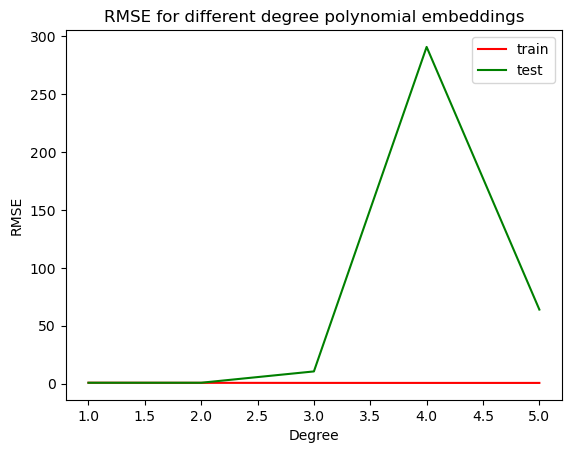

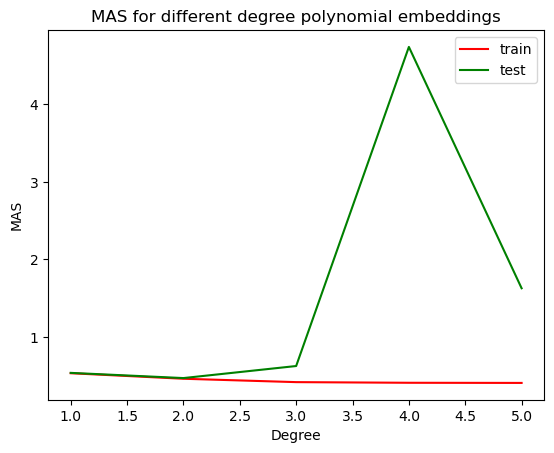

In [27]:
from sklearn.preprocessing import PolynomialFeatures

RMSE_train = []
RMSE_test = []
MAS_train = []
MAS_test = []

degrees = [1, 2, 3, 4, 5]
# I will be using the split with 25% of data in test and 75% in train.
X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size = 0.75) 

for degree in degrees: 
    model = LinearRegression()
    
    poly_f = PolynomialFeatures(degree=degree)
    X_train_poly = poly_f.fit_transform(X_train)
    model.fit(X_train_poly, y_train)
    
    y_train_predicted = model.predict(X_train_poly)
    y_test_predict = model.predict(poly_f.fit_transform(X_test))
    
    RMSE_train_new = RMSE(y_train, y_train_predicted)
    RMSE_train.append(RMSE_train_new)
    RMSE_test_new = RMSE(y_test, y_test_predict)
    RMSE_test.append(RMSE_test_new)
    
    MAS_train_new = mean_absolute_error(y_train, y_train_predicted)
    MAS_train.append(MAS_train_new)
    MAS_test_new = mean_absolute_error(y_test, y_test_predict)
    MAS_test.append(MAS_test_new)
    
    
# plot degree and RMSE
plt.plot(degrees, RMSE_train, color='r', label='train')
plt.plot(degrees, RMSE_test, color='g', label='test')
  
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for different degree polynomial embeddings")
plt.legend()
plt.show()

# plot degree and MAS
plt.plot(degrees, MAS_train, color='r', label='train')
plt.plot(degrees, MAS_test, color='g', label='test')
  
plt.xlabel("Degree")
plt.ylabel("MAS")
plt.title("MAS for different degree polynomial embeddings")
plt.legend()
plt.show()

### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?

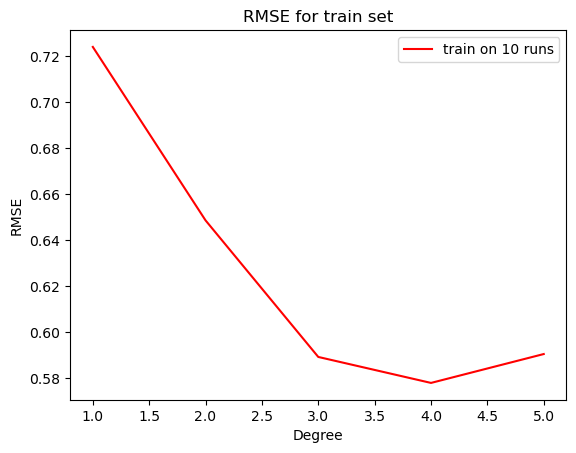

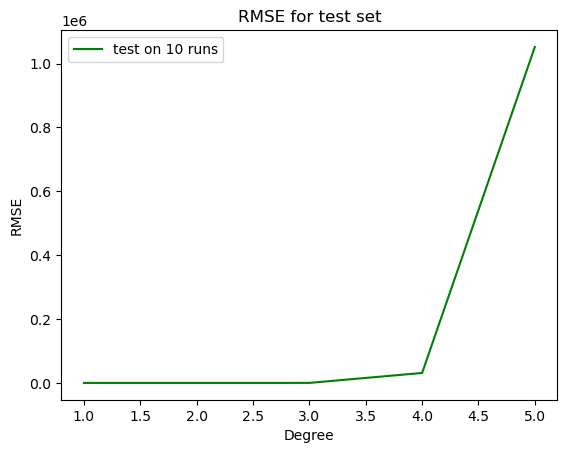

In [31]:
# I will only be checking RMS error on 10 runs

RMSE_train = []
RMSE_test = []

degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    RMSE_train_deg = []
    RMSE_test_deg = []
    # 10 runs
    for i in range(10): 
        X_train, X_test, y_train, y_test = train_test_split(df, targets, train_size = 0.75)   
        model = LinearRegression()
    
        poly_f = PolynomialFeatures(degree=degree)
        X_train_poly = poly_f.fit_transform(X_train)
        model.fit(X_train_poly, y_train)
    
        y_train_predicted = model.predict(X_train_poly)
        y_test_predict = model.predict(poly_f.fit_transform(X_test))
        
        RMSE_train_curr = RMSE(y_train, y_train_predicted)
        RMSE_train_deg.append(RMSE_train_curr)
        RMSE_test_curr = RMSE(y_test, y_test_predict)
        RMSE_test_deg.append(RMSE_test_curr)
        
    
    # calculating the average
    RMSE_train_val = sum(RMSE_train_deg) / len(RMSE_train_deg)
    RMSE_test_val = sum(RMSE_test_deg) / len(RMSE_test_deg)

    RMSE_train.append(RMSE_train_val)
    RMSE_test.append(RMSE_test_val)
    
# plot degree and RMSE on train
plt.plot(degrees, RMSE_train, color='r', label='train on 10 runs')
  
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for train set")
plt.legend()
plt.show()

# plot degree and RMSE on test
plt.plot(degrees, RMSE_test, color='g', label='test on 10 runs')
  
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for test set")
plt.legend()
plt.show()


I would conclude that the best degree for the model is the 4th, since it is the one that has a small RMS error on the train set and after the 4th degree on the test set the error grows suddenly.